In [75]:
# import cv2
# import easyocr
# import pytesseract
# import cv2
# import os
# import numpy as np
# import pytesseract
# import easyocr
# import matplotlib.pyplot as plt
# # from ocr import OCR
# # from tensorflow.keras import keras_ocr 
# # from opencv_python_headless

In [32]:
# !pip install ocr
# !pip install torch torchvision torchaudio

In [27]:
# img = cv2.imread('C:/Users/ArtiMarthak/Downloads/cv/nick/ANPRwithPython-main/ANPRwithPython-main/data/image2.jpg')

In [ ]:
# ocr=OCR(image_folder="C:/Users/ArtiMarthak/Downloads/cv/nick/ANPRwithPython-main/ANPRwithPython-main/data/image2.jpg")  

# ocr.keras_ocr_works()
# ocr.easyocr_model_works()  
# ocr.pytesseract_model_works()


In [ ]:
# It seems that pytesseract is not very good at detecting text in the entire image and converting str. Instead, text should be detected first with text detection and the texts have to given OCR engines.

# While keras_ocr is good in terms of accuracy but it is costly in terms of time. Also if you’re using CPU, time might be an issue for you. Keras-OCR is image specific OCR tool. If text is inside the image and their fonts and colors are unorganized.

# Easy-OCR is lightweight model which is giving a good performance for receipt or PDF conversion. It is giving more accurate results with organized texts like PDF files, receipts, bills. Easy OCR also performs well on noisy images.

# Pytesseract is performing well for high-resolution images. Certain morphological operations such as dilation, erosion, OTSU binarization can help increase pytesseract performance.

In [51]:
import cv2
import numpy as np
import easyocr
from matplotlib import pyplot as plt

In [70]:
# img = cv2.imread('C:/Users/ArtiMarthak/Downloads/cv/nick/EasyOCR-main/EasyOCR-main/data/surf.jpeg')
img = 'C:/Users/ArtiMarthak/Downloads/cv/nick/EasyOCR-main/EasyOCR-main/data/sign.png'

In [71]:
img

'C:/Users/ArtiMarthak/Downloads/cv/nick/EasyOCR-main/EasyOCR-main/data/sign.png'

In [72]:
reader = easyocr.Reader(['en'],gpu=False)
result = reader.readtext(img)
result

Using CPU. Note: This module is much faster with a GPU.


[([[19, 181], [165, 181], [165, 201], [19, 201]],
  'HEAD PROTECTION',
  0.9778256601171587),
 ([[31, 201], [153, 201], [153, 219], [31, 219]],
  'MUST BE WORN',
  0.9719649866726915),
 ([[39, 219], [145, 219], [145, 237], [39, 237]],
  'ON THIS SITE',
  0.9683972823468038)]

In [61]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

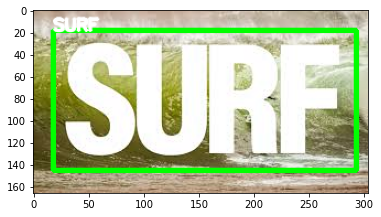

In [65]:
img1 = cv2.imread(img)
img1 = cv2.rectangle(img1,top_left,bottom_right,(0,255,0),3)
img1 = cv2.putText(img1,text,top_left,font,0.5,(255,255,255),2,cv2.LINE_AA)
plt.imshow(img1)

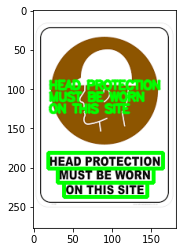

In [73]:
#multiple line ahndling togather
img1 = cv2.imread(img)
spacer = 100
for detection in result: 
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    img = cv2.rectangle(img1,top_left,bottom_right,(0,255,0),3)
    img = cv2.putText(img1,text,(20,spacer), font, 0.5,(0,255,0),2,cv2.LINE_AA)
    spacer+=15
    
plt.imshow(img1)
